Reading data for target HD185859: 100%|██████████| 166/166 [00:00<00:00, 7512.38it/s]


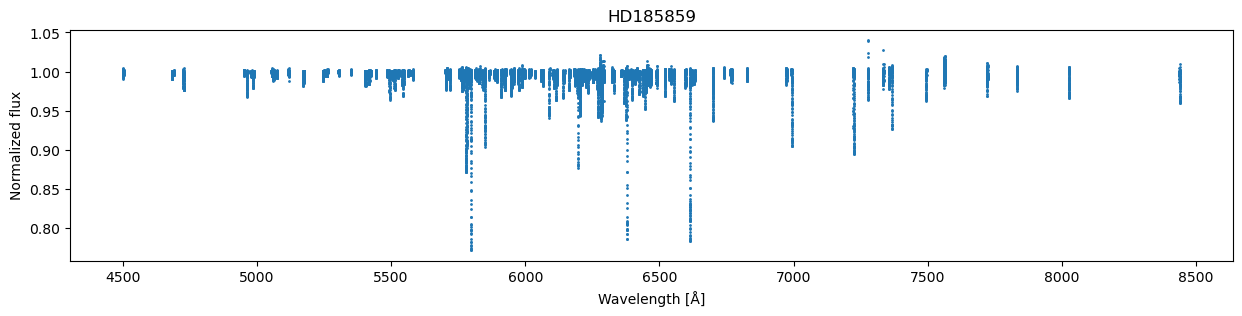

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
from roman import toRoman

from spectrum import Spectrum
from dirs import DATA_FOLDER, OUTPUT_FOLDER

hd185859 = Spectrum('HD185859')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
hd185859.plot(ax)

In [7]:
class AtomicLine:
    def __init__(self, atom: str, ionization_state: int, wavelength: float, rel_intensity: str):
        self.atom = atom
        self.ionization_state = ionization_state
        self.wavelength = wavelength
        self.rel_intensity = rel_intensity
    
    def fmt_atom(self):
        return f'{self.atom} {toRoman(int(self.ionization_state))}'
    
ATOMIC_LINES = [
    AtomicLine(*line) for line in np.loadtxt(
        path.join(DATA_FOLDER, 'spectral_lines.csv'),
            dtype=[('atom', 'U15'), ('ionization_state', np.int8), ('wavelength', np.float64), ('rel_intensity', 'U15')],
            delimiter=",", usecols=(0, 1, 2, 3), skiprows=1
    )
]


/tmp/ipykernel_7472/2494477914.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


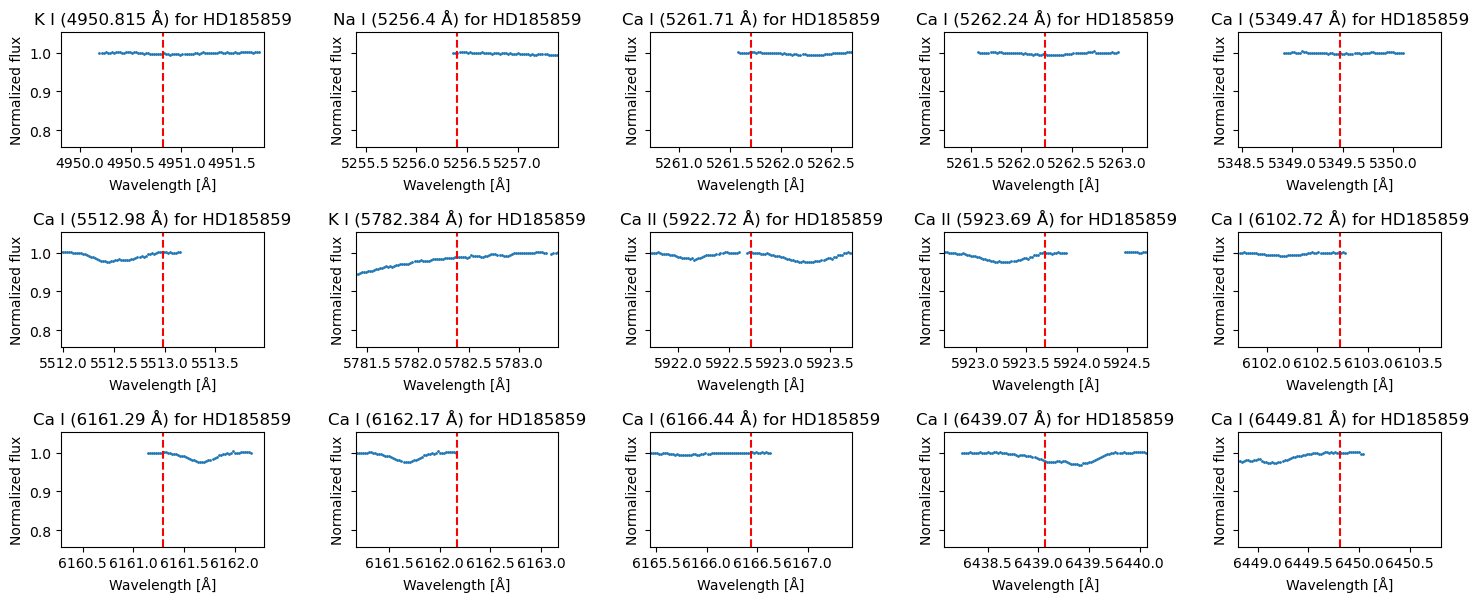

In [8]:
def detected_atomic_lines(spectrum: Spectrum, margin: int = 5):
    return [
        atomic_line for atomic_line in ATOMIC_LINES
            if spectrum.wavelength[np.abs(spectrum.wavelength - atomic_line.wavelength) < margin].size > 0
    ]

def plot_around_line(spectrum: Spectrum, line: AtomicLine, margin: float = 5, savefile: str | None = None):
    plt.plot(spectrum.wavelength, spectrum.flux, '.', ms=2, label=spectrum.target)
    plt.axvline(line.wavelength, label=f'{line.fmt_atom()}: {line.wavelength} Å', color='red')

    plt.title(f'{line.fmt_atom()} for {spectrum.target}')
    plt.xlabel('Wavelength [Å]')
    plt.ylabel('Normalized flux')
    plt.xlim(line.wavelength - margin, line.wavelength + margin)
    plt.legend()

    if savefile != None:
        plt.savefig(path.join(OUTPUT_FOLDER, savefile))

    plt.show()

MARGIN = 0.05
detected_als = detected_atomic_lines(hd185859, MARGIN)
N_COLUMNS = 5
N_ROWS = int(np.ceil(len(detected_als)) / N_COLUMNS)
fig, axes = plt.subplots(nrows=N_ROWS, ncols=N_COLUMNS, sharey=True)

for line, ax in zip(detected_als, axes.flatten()):
    ax.plot(hd185859.wavelength, hd185859.flux, '.', ms=2, label=hd185859.target)
    ax.axvline(line.wavelength, linestyle='--', label=f'{line.fmt_atom()}: {line.wavelength} Å', color='red')

    ax.set_title(f'{line.fmt_atom()} ({line.wavelength} Å) for {hd185859.target}')
    ax.set_xlabel('Wavelength [Å]')
    ax.set_ylabel('Normalized flux')
    ax.set_xlim(line.wavelength - 1, line.wavelength + 1)
    ax.ticklabel_format(useOffset=False)

FIG_SIZE = 15

fig.tight_layout(pad=0)
fig.set_size_inches(FIG_SIZE, 6)
fig.show()